# Homework 2

## Appartment Prices

In [3]:
import pandas as pd

Read the raw csv link and save it as a dataset

In [4]:
df_appartment_prices = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

Remove some unneccessary columns to make it easier to read.

In [5]:
df_appartment_prices_relevent = df_appartment_prices[["listPrice", "livingArea", "rooms", "constructionYear", "soldDate", "soldPrice"]].copy()
df_appartment_prices_relevent

,listPrice,livingArea,rooms,constructionYear,soldDate,soldPrice
0,3995000,73.0,3.0,1935.0,2018-11-08,3820000
1,1995000,36.0,1.0,1968.0,2018-10-19,2355000
2,5100000,81.0,3.0,1936.0,2018-09-27,6110000
3,5495000,107.0,4.0,1936.0,2018-09-06,8050000
4,1995000,29.0,1.0,1936.0,2018-06-18,2400000
...,...,...,...,...,...,...
153,1495000,26.0,1.0,1935.0,2012-11-30,1475000
154,2245000,50.0,2.0,1935.0,2012-10-27,2245000
155,1450000,23.0,1.0,1936.0,2012-10-22,1450000
156,2495000,56.0,3.0,1935.0,2012-10-09,2200000


Divide the soldPrice with livingArea to calculate the price per squaremeter.

In [6]:
df_appartment_prices_relevent["ppsqm"] = df_appartment_prices_relevent["soldPrice"] / df_appartment_prices["livingArea"]
df_appartment_prices_relevent

,listPrice,livingArea,rooms,constructionYear,soldDate,soldPrice,ppsqm
0,3995000,73.0,3.0,1935.0,2018-11-08,3820000,52328.767123
1,1995000,36.0,1.0,1968.0,2018-10-19,2355000,65416.666667
2,5100000,81.0,3.0,1936.0,2018-09-27,6110000,75432.098765
3,5495000,107.0,4.0,1936.0,2018-09-06,8050000,75233.644860
4,1995000,29.0,1.0,1936.0,2018-06-18,2400000,82758.620690
...,...,...,...,...,...,...,...
153,1495000,26.0,1.0,1935.0,2012-11-30,1475000,56730.769231
154,2245000,50.0,2.0,1935.0,2012-10-27,2245000,44900.000000
155,1450000,23.0,1.0,1936.0,2012-10-22,1450000,63043.478261
156,2495000,56.0,3.0,1935.0,2012-10-09,2200000,39285.714286


Sort it by ppsqm, only show the top five using head function.

In [7]:
df_appartment_prices_sorted = df_appartment_prices_relevent.sort_values("ppsqm", ascending = False)
df_appartment_prices_sorted.head(5)

,listPrice,livingArea,rooms,constructionYear,soldDate,soldPrice,ppsqm
67,1595000,24.0,1.0,1935.0,2016-01-21,2500000,104166.666667
50,1890000,24.0,1.0,1935.0,2016-06-21,2450000,102083.333333
54,1795000,23.0,1.0,1935.0,2016-04-28,2300000,100000.000000
34,1750000,25.0,1.0,1936.0,2017-06-01,2210000,88400.000000
55,1895000,26.9,1.0,1968.0,2016-04-19,2300000,85501.858736


Calculate the average using the .mean() function.

In [8]:
average_ppsqm = df_appartment_prices_sorted["ppsqm"].mean()
float(average_ppsqm)

58759.382760081724

I want to examine if the year the appartment where built has any correlation with the ppsqm.

In [9]:
df_appartment_prices_sorted_by_year = df_appartment_prices_relevent.sort_values("constructionYear", ascending = True)

In [10]:
df_no_na = df_appartment_prices_sorted_by_year.dropna(subset=["constructionYear"])
average_new = df_no_na.tail(20)["ppsqm"].mean()
average_old = df_no_na.head(20)["ppsqm"].mean()

In [11]:
int(average_new)

53924

In [12]:
int(average_old)

65396

### Conclusion

The 20 oldest appartments are on average more expensive per squaremeter then the 20 newest. You could try this with tail/head (30) or (50) and get a similar result.

## The Swedish Election of 2018


Read the file, setting conditions for delimiters, decimals and NA values.

In [13]:
df_election = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", delimiter = ";", decimal = ",", na_values = [" ", ""])

In [14]:
df_stockholm = df_election[df_election["LÄNSNAMN"].str.contains("Stockholms län")]

In [15]:
legitimate_total = df_stockholm["RÖSTER GILTIGA"].sum()
int(legitimate_total)

1426237

In [16]:
highest_S = df_election.sort_values("S", ascending = False).iloc[0]["KOMMUNNAMN"]
highest_S

'Munkfors'

In [17]:
df_sorted_participation = df_election.sort_values("VALDELTAGANDE", ascending = False)
df_sorted_participation_relevent = df_sorted_participation[["KOMMUNNAMN", "VALDELTAGANDE"]]
df_sorted_participation_relevent.head(5)

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13
22,Vaxholm,92.74
5,Ekerö,92.16


# Predicting Strokes

In [18]:
df_stroke = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

In [19]:
heart_disease_total = df_stroke["heart_disease"].value_counts()

In [20]:
percentage_total = int(heart_disease_total[1]) / int(heart_disease_total.sum())

In [36]:
df_rural = df_stroke[df_stroke["Residence_type"].str.contains("Rural")]
heart_disease_rural = df_rural["heart_disease"].value_counts()

In [22]:
percentage_rural = int(heart_disease_rural[1]) / int(heart_disease_rural.sum())

In [23]:
df_urban = df_stroke[df_stroke["Residence_type"].str.contains("Urban")]
heart_disease_urban = df_urban["heart_disease"].value_counts()

In [24]:
percentage_urban = int(heart_disease_urban[1]) / int(heart_disease_urban.sum())

In [25]:
df_smokes = df_stroke[df_stroke["smoking_status"].str.contains("smokes")]
heart_disease_smokes = df_smokes["heart_disease"].value_counts()

In [26]:
percentage_smokes = int(heart_disease_smokes[1]) / int(heart_disease_smokes.sum())

In [27]:
df_never_smoked = df_stroke[df_stroke["smoking_status"].str.contains("never smoked")]
heart_disease_never_smoked = df_never_smoked["heart_disease"].value_counts()

In [28]:
percentage_never_smoked = int(heart_disease_never_smoked[1]) / int(heart_disease_never_smoked.sum())

In [29]:
df_formerly_smoked = df_stroke[df_stroke["smoking_status"].str.contains("formerly smoked")]
heart_disease_formerly_smoked = df_formerly_smoked["heart_disease"].value_counts()

In [30]:
percentage_formerly_smoked = int(heart_disease_formerly_smoked[1]) / int(heart_disease_formerly_smoked.sum())

In [31]:
percentage_dict = { 
    "Total" : percentage_total,
    "Rural" : percentage_rural,
    "Urban" : percentage_urban, 
    "Smokes" : percentage_smokes, 
    "Formerly \n smoked" : percentage_formerly_smoked, 
    "Never \n smoked" : percentage_never_smoked}

In [32]:
labels = list(percentage_dict.keys())
percentages = [value * 100 for value in percentage_dict.values()]

In [33]:
import matplotlib.pyplot as plt

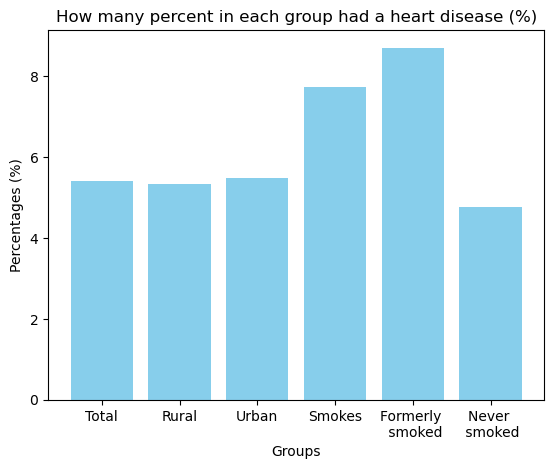

In [34]:
plt.bar(labels, percentages, color='skyblue')
plt.xlabel("Groups")
plt.ylabel("Percentages (%)")
plt.title("How many percent in each group had a heart disease (%)")
plt.show()

### Conclusion

Based only on this sample and information, smoking seem to affect the chances of having a heart disease more then if you live in a rural or urban enviroment. No more mayor conclusions should be drawn because the data does not provide enough information. For example we dont know for how long or how much the people who checkes "Smokes" or "Formerly smoked" do/did smoke, so we should not draw the conclusion that continuing smoking gives you a smaller chance of getting a heart disease then quiting whould do (even if it might look like that based on the plot).